# Preprocessing w Python

## Część 2:

5. Dyskretyzacja danych.
6. Kodowanie zmiennych kategorycznych.  
7. Tworzenie nowych zmiennych na podstawie już istniejących. *
8. Sprawdzanie korelacji zmiennych. *

In [31]:
# Import potrzebnych bibliotek

import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
# Wczytanie danych

data = [
    ["A", 10.38, 50, 4],
    ["B", 15.50, 30, 5],
    ["C", 8.29, 70, 3],
    ["D", 20.99, 30, 4],
    ["F", 14.49, 62, 2],
    ["G", 11.99, 60, 5],
]

df = pd.DataFrame(
    data, columns=["Produkt", "Cena", "Liczba sprzedanych", "Ocena klienta"]
)

df["Dostępność"] = [
    "dostępny",
    "wyprzedany",
    "na zamówienie",
    "dostępny",
    "wyprzedany",
    "dostępny",
]

df = df.set_index(df.columns[0])

df

,Cena,Liczba sprzedanych,Ocena klienta,Dostępność
Produkt,,,,
A,10.38,50,4,dostępny
B,15.50,30,5,wyprzedany
C,8.29,70,3,na zamówienie
D,20.99,30,4,dostępny
F,14.49,62,2,wyprzedany
G,11.99,60,5,dostępny


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, A to G
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cena                6 non-null      float64
 1   Liczba sprzedanych  6 non-null      int64  
 2   Ocena klienta       6 non-null      int64  
 3   Dostępność          6 non-null      object 
dtypes: float64(1), int64(2), object(1)
memory usage: 240.0+ bytes


## 5. Dyskretyzacja danych

In [34]:
# Dyskretyzacja zmiennej Cena według równej szerokości metodą pandas.cut() w Pandas

df_disc = df.copy()

df_disc["Cena_dyskretyzowana_cut"] = pd.cut(
    df_disc["Cena"], bins=3, labels=["niska", "średnia", "wysoka"]
)

df_disc

,Cena,Liczba sprzedanych,Ocena klienta,Dostępność,Cena_dyskretyzowana_cut
Produkt,,,,,
A,10.38,50,4,dostępny,niska
B,15.50,30,5,wyprzedany,średnia
C,8.29,70,3,na zamówienie,niska
D,20.99,30,4,dostępny,wysoka
F,14.49,62,2,wyprzedany,średnia
G,11.99,60,5,dostępny,niska


In [35]:
df_disc["Cena_dyskretyzowana_cut"] = pd.cut(df_disc["Cena"], bins=3, labels=[0, 1, 2])

df_disc

,Cena,Liczba sprzedanych,Ocena klienta,Dostępność,Cena_dyskretyzowana_cut
Produkt,,,,,
A,10.38,50,4,dostępny,0
B,15.50,30,5,wyprzedany,1
C,8.29,70,3,na zamówienie,0
D,20.99,30,4,dostępny,2
F,14.49,62,2,wyprzedany,1
G,11.99,60,5,dostępny,0


In [36]:
# Dyskretyzacja zmiennej Cena według równej częstości metodą pandas.qcut() w Pandas

df_disc["Cena_dyskretyzowana_qcut"] = pd.qcut(df_disc["Cena"], q=3, labels=[0, 1, 2])

df_disc

,Cena,Liczba sprzedanych,Ocena klienta,Dostępność,Cena_dyskretyzowana_cut,Cena_dyskretyzowana_qcut
Produkt,,,,,,
A,10.38,50,4,dostępny,0,0
B,15.50,30,5,wyprzedany,1,2
C,8.29,70,3,na zamówienie,0,0
D,20.99,30,4,dostępny,2,2
F,14.49,62,2,wyprzedany,1,1
G,11.99,60,5,dostępny,0,1


In [37]:
# Dyskretyzacja zmiennej Cena z wykorzystaniem klasy KBinsDiscretizer w module sklearn.preprocessing
# a. wg równej szerokości

discretizer = KBinsDiscretizer(
    n_bins=3, encode="ordinal", strategy="uniform", subsample=200_000
)

df_disc["Cena_dyskretyzowana_KBinsDisc_ord"] = discretizer.fit_transform(
    df_disc[["Cena"]]
)

df_disc

,Cena,Liczba sprzedanych,Ocena klienta,Dostępność,Cena_dyskretyzowana_cut,Cena_dyskretyzowana_qcut,Cena_dyskretyzowana_KBinsDisc_ord
Produkt,,,,,,,
A,10.38,50,4,dostępny,0,0,0.0
B,15.50,30,5,wyprzedany,1,2,1.0
C,8.29,70,3,na zamówienie,0,0,0.0
D,20.99,30,4,dostępny,2,2,2.0
F,14.49,62,2,wyprzedany,1,1,1.0
G,11.99,60,5,dostępny,0,1,0.0


In [38]:
# b. wg równej częstości

discretizer = KBinsDiscretizer(
    n_bins=3, encode="ordinal", strategy="quantile", subsample=200_000
)

df_disc["Cena_dyskretyzowana_KBinsDisc_quan"] = discretizer.fit_transform(
    df_disc[["Cena"]]
)

df_disc

,Cena,Liczba sprzedanych,Ocena klienta,Dostępność,Cena_dyskretyzowana_cut,Cena_dyskretyzowana_qcut,Cena_dyskretyzowana_KBinsDisc_ord,Cena_dyskretyzowana_KBinsDisc_quan
Produkt,,,,,,,,
A,10.38,50,4,dostępny,0,0,0.0,0.0
B,15.50,30,5,wyprzedany,1,2,1.0,2.0
C,8.29,70,3,na zamówienie,0,0,0.0,0.0
D,20.99,30,4,dostępny,2,2,2.0,2.0
F,14.49,62,2,wyprzedany,1,1,1.0,1.0
G,11.99,60,5,dostępny,0,1,0.0,1.0


## 6. Kodowanie zmiennych kategorycznych

In [39]:
# Kodowanie zmiennej kategorycznej Dostępność przy użyciu One-Hot Encoding

df_enc = pd.get_dummies(df, columns=["Dostępność"])

df_enc

,Cena,Liczba sprzedanych,Ocena klienta,Dostępność_dostępny,Dostępność_na zamówienie,Dostępność_wyprzedany
Produkt,,,,,,
A,10.38,50,4,1,0,0
B,15.50,30,5,0,0,1
C,8.29,70,3,0,1,0
D,20.99,30,4,1,0,0
F,14.49,62,2,0,0,1
G,11.99,60,5,1,0,0


In [41]:
# Kodowanie zmiennej kategorycznej Dostępność przy użyciu Label Encoding

le = LabelEncoder()

df_enc["Dostępność_l_encoder"] = le.fit_transform(df["Dostępność"])

df_enc

,Cena,Liczba sprzedanych,Ocena klienta,Dostępność_dostępny,Dostępność_na zamówienie,Dostępność_wyprzedany,Dostępność_l_encoder
Produkt,,,,,,,
A,10.38,50,4,1,0,0,0
B,15.50,30,5,0,0,1,2
C,8.29,70,3,0,1,0,1
D,20.99,30,4,1,0,0,0
F,14.49,62,2,0,0,1,2
G,11.99,60,5,1,0,0,0


## 7. Tworzenie nowych zmiennych na podstawie już istniejących

In [42]:
df["Przychód"] = df["Cena"] * df["Liczba sprzedanych"]

df

,Cena,Liczba sprzedanych,Ocena klienta,Dostępność,Przychód
Produkt,,,,,
A,10.38,50,4,dostępny,519.00
B,15.50,30,5,wyprzedany,465.00
C,8.29,70,3,na zamówienie,580.30
D,20.99,30,4,dostępny,629.70
F,14.49,62,2,wyprzedany,898.38
G,11.99,60,5,dostępny,719.40


## 8. Sprawdzanie korelacji zmiennych

In [43]:
correlation_matrix = df[
    ["Cena", "Liczba sprzedanych", "Ocena klienta", "Przychód"]
].corr()

correlation_matrix

,Cena,Liczba sprzedanych,Ocena klienta,Przychód
Cena,1.000000,-0.782233,0.146263,0.114576
Liczba sprzedanych,-0.782233,1.000000,-0.540387,0.483764
Ocena klienta,0.146263,-0.540387,1.000000,-0.610769
Przychód,0.114576,0.483764,-0.610769,1.000000


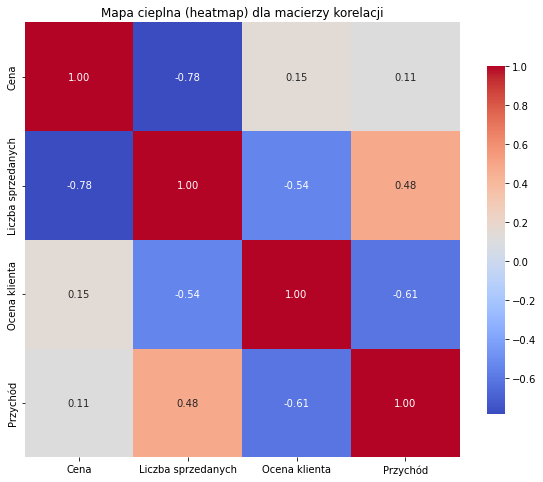

In [44]:
# Mapa cieplna dla powyższej macierzy korelacji

plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    cbar_kws={"shrink": 0.8},
)
plt.title("Mapa cieplna (heatmap) dla macierzy korelacji")
plt.show()